In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option ('display.max_columns',50)
plt.rcParams['figure.figsize']=[15,8]

In [2]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
sub=pd.read_csv('submission.csv')
test.shape,train.shape,sub.shape

((15000, 19), (35000, 20), (15000, 1))

In [3]:

combined=pd.concat([train,test],ignore_index=True)
combined.shape

(50000, 20)

In [4]:
combined.select_dtypes(include=np.number).columns

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

In [5]:
#converting the above variables in Object.
combined['imp_surcharge']=combined['imp_surcharge'].astype(np.object)
combined['mta_tax']=combined['mta_tax'].astype(np.object)
combined['payment_type']=combined['payment_type'].astype(np.object)
combined['rate_code']=combined['rate_code'].astype(np.object)


### Univariate Analysis.

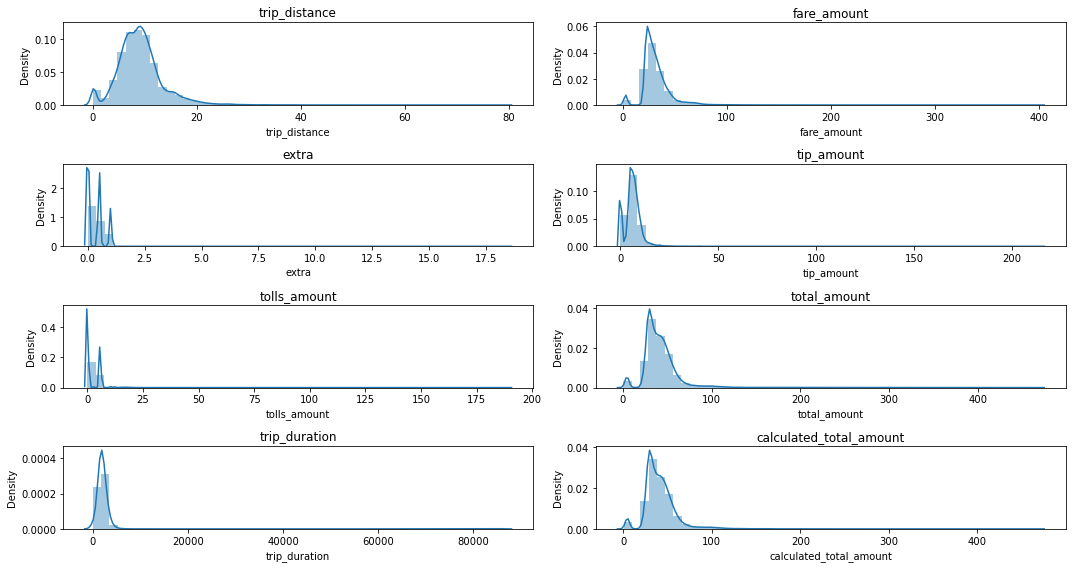

In [6]:
num=['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount',  'trip_duration',
       'calculated_total_amount']
it=1
for i in num:
    plt.subplot(4,2,it)
    sns.distplot(combined.loc[:,i])
    plt.title(i)
    it+=1
plt.tight_layout()
plt.show()

Here,Every variable has skewed values

In [7]:
cat=combined.select_dtypes(np.object)

In [8]:
cat.columns

Index(['rate_code', 'store_and_fwd_flag', 'payment_type', 'mta_tax',
       'imp_surcharge'],
      dtype='object')

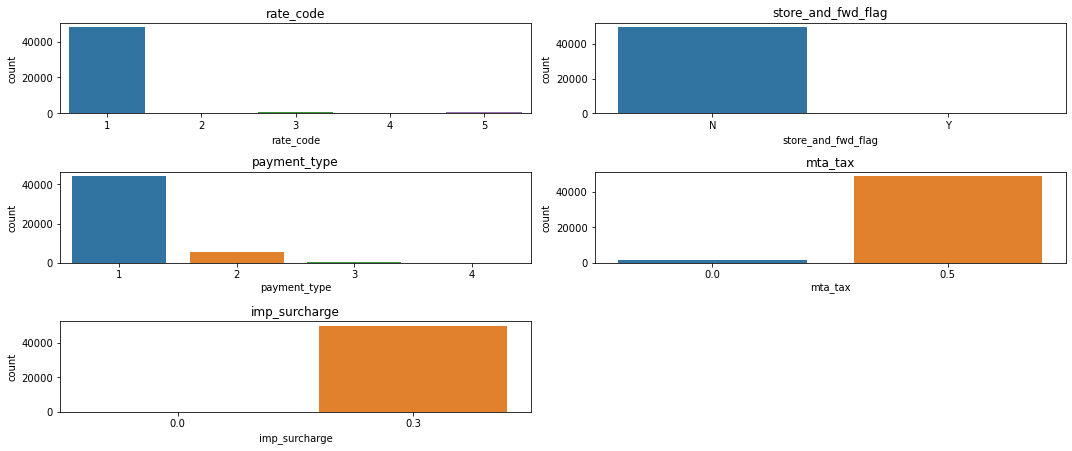

In [9]:

it=1
for i in cat:
    plt.subplot(4,2,it)
    sns.countplot(combined.loc[:,i])
    plt.title(i)
    it+=1
plt.tight_layout()

plt.show()


### Bi variate Analysis.

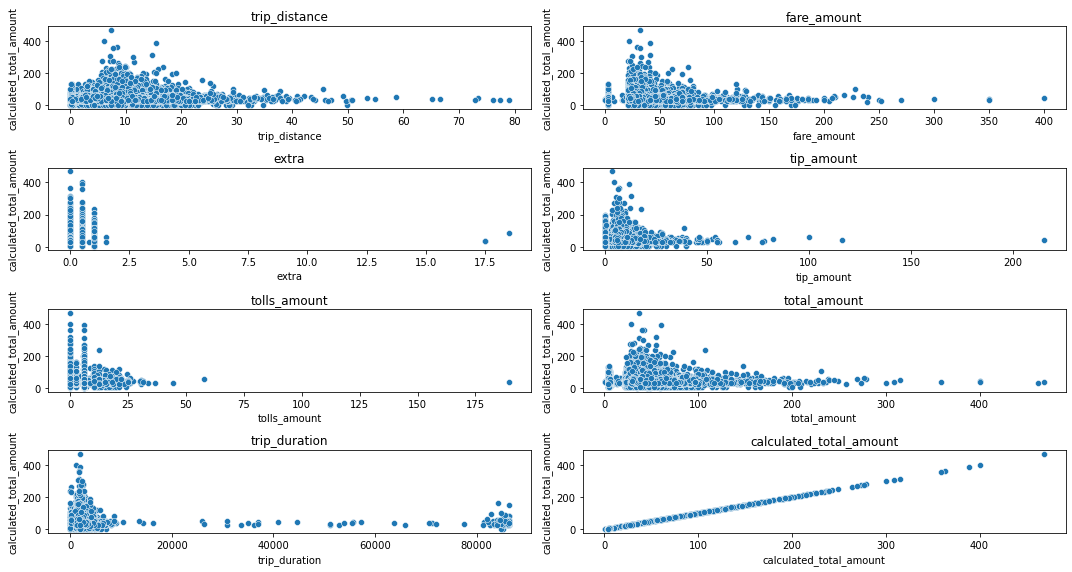

In [10]:
it=1
for i in num:
    plt.subplot(4,2,it)
    sns.scatterplot(combined.loc[:,i],combined.calculated_total_amount)
    plt.title(i)
    it+=1
plt.tight_layout()

plt.show()


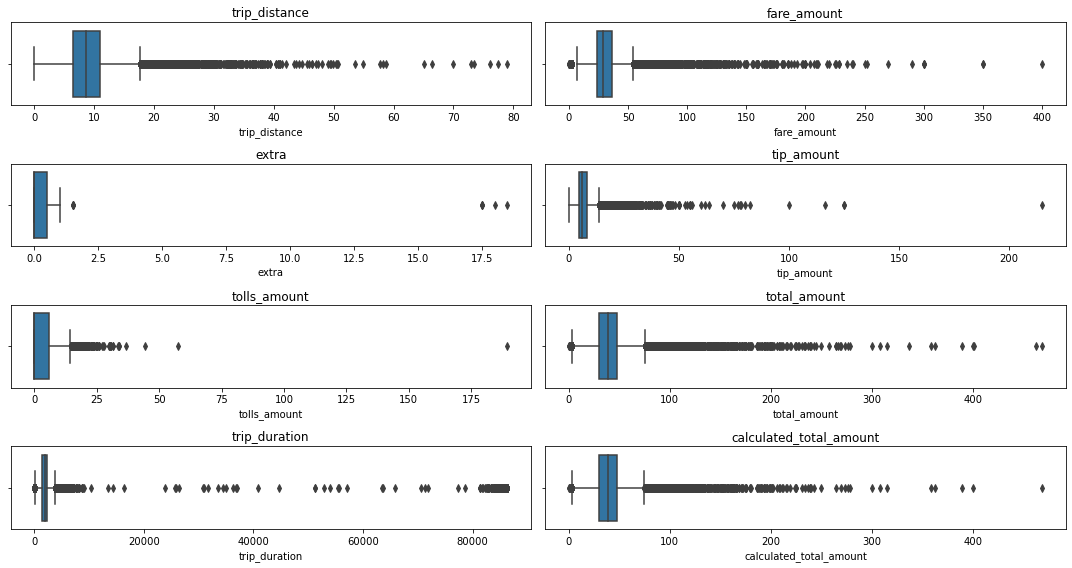

In [11]:
it=1
for i in num:
    plt.subplot(4,2,it)
    sns.boxplot(combined.loc[:,i])
    plt.title(i)
    it+=1
plt.tight_layout()

plt.show()


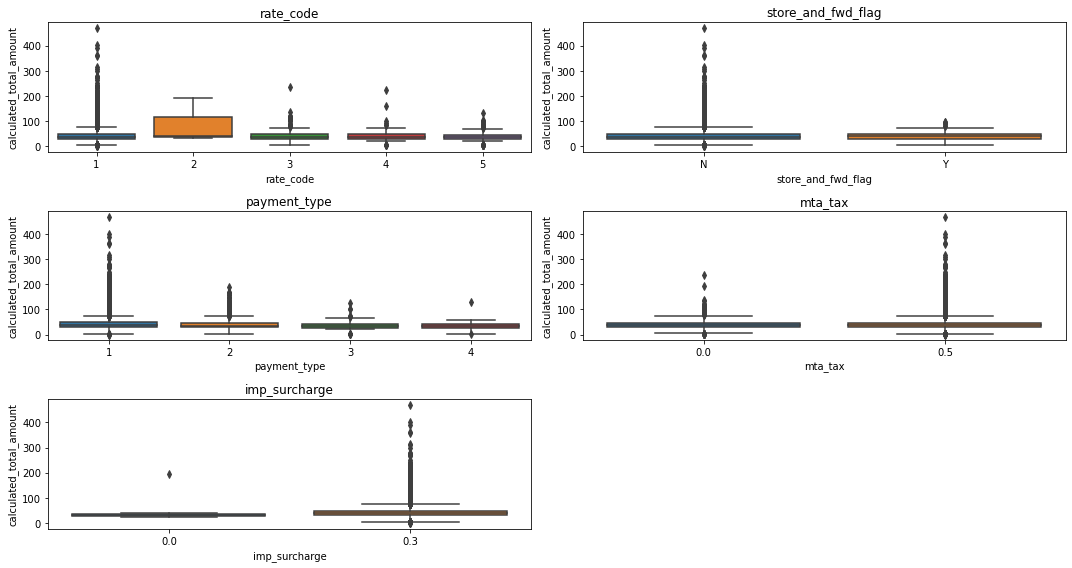

In [12]:

it=1
for i in cat:
    plt.subplot(3,2,it)
    sns.boxplot(combined.loc[:,i],combined.calculated_total_amount)
    plt.title(i)
    it+=1
plt.tight_layout()

plt.show()


In [13]:
# check for missing values
combined.isnull().sum()

trip_distance                  0
rate_code                      0
store_and_fwd_flag             0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
imp_surcharge                  0
total_amount                   0
pickup_location_id             0
dropoff_location_id            0
year                           0
month                          0
day                            0
day_of_week                    0
hour_of_day                    0
trip_duration                  0
calculated_total_amount    15000
dtype: int64

In [14]:
combined.year.unique()

array([2018], dtype=int64)

<AxesSubplot:>

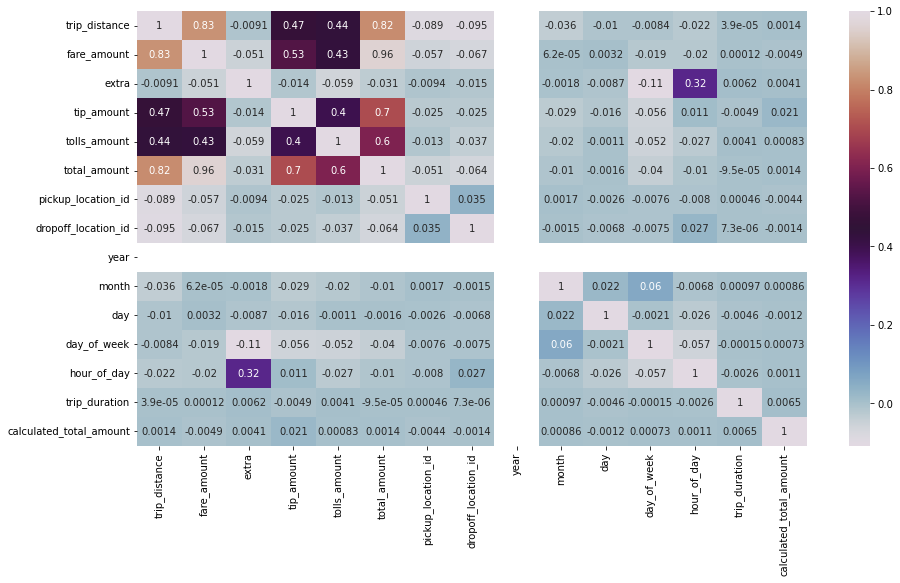

In [15]:
sns.heatmap(combined.corr(),annot=True,cmap='twilight')

### Feature Engineering.

<AxesSubplot:xlabel='hour_of_day', ylabel='calculated_total_amount'>

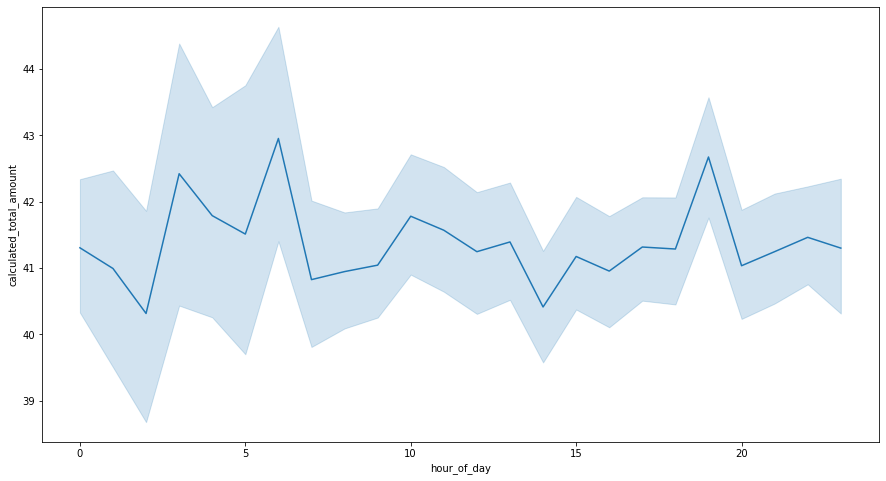

In [16]:
sns.lineplot(x=combined.loc[:,'hour_of_day'],y=combined.calculated_total_amount)

In [17]:
combined['rush_hour']=combined.hour_of_day.apply(lambda x:1 if x in [6,10,15,16,17,18,19,20] else 0)

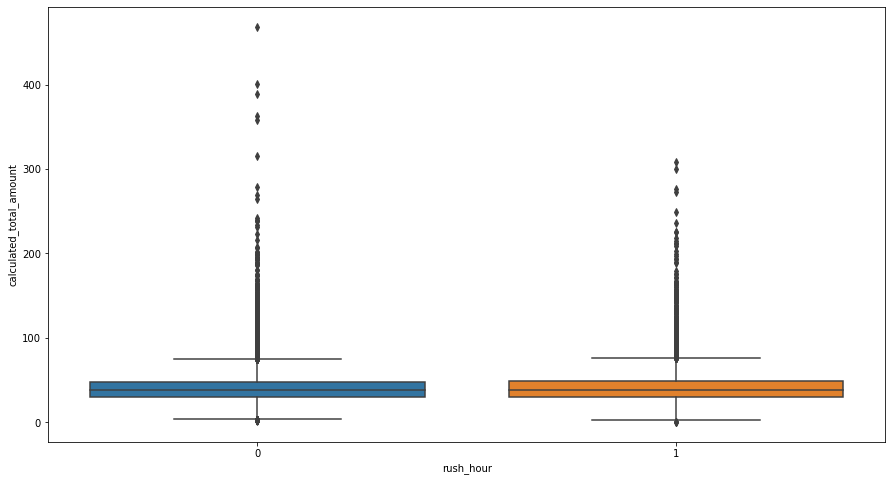

In [18]:
sns.boxplot(combined.rush_hour,combined.calculated_total_amount)
plt.show()

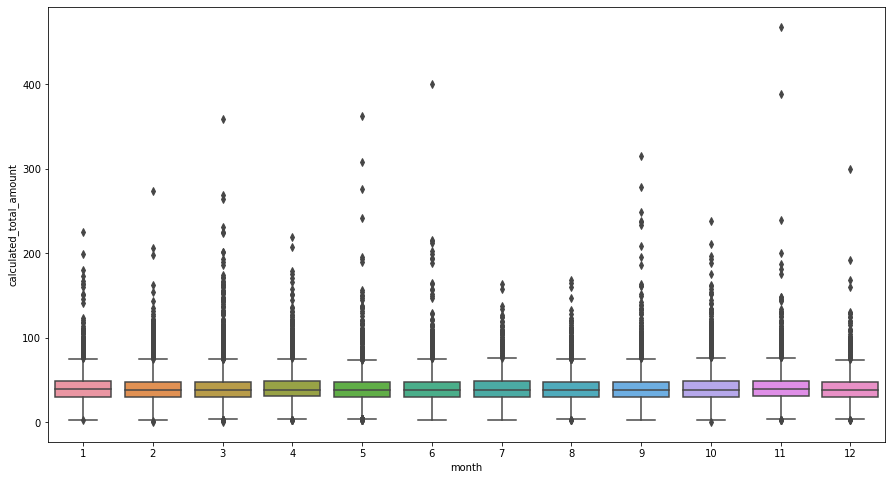

In [19]:
sns.boxplot(combined.month,combined.calculated_total_amount)
plt.show()

In [20]:
from  yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
km=KMeans()
visualizer=KElbowVisualizer(estimator=km)

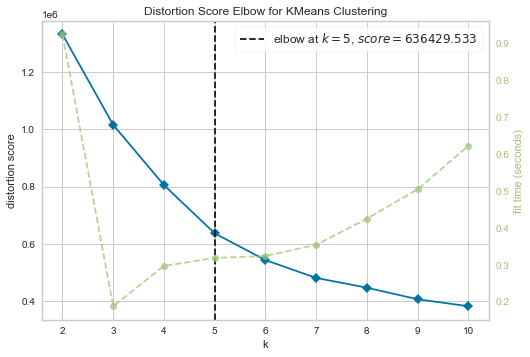

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
data=combined.loc[:,['day_of_week','hour_of_day','month']]
visualizer.fit(data)
visualizer.show()

In [22]:
#n_cluster=5
km=KMeans(n_clusters=5,random_state=0)
k=km.fit(data)

In [23]:
combined['clusters']=k.labels_
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,rush_hour,clusters
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30,1,4
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40,1,4
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36,0,4
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30,1,3
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80,0,3


In [24]:
combined['trip_duration']=(combined.trip_duration/60)

In [25]:
combined.trip_duration

0        35.516667
1        39.616667
2        21.433333
3        43.100000
4        26.250000
           ...    
49995    18.683333
49996    29.066667
49997    22.700000
49998     1.683333
49999    40.733333
Name: trip_duration, Length: 50000, dtype: float64

In [26]:
combined.trip_distance

0         9.01
1         0.20
2         9.65
3         9.50
4         5.80
         ...  
49995     5.80
49996    10.50
49997     9.10
49998     9.50
49999     9.25
Name: trip_distance, Length: 50000, dtype: float64

In [27]:
newtrain=combined.loc[0:train.shape[0]-1, :]
newtest=combined.loc[train.shape[0]:, :]


In [28]:
newtrain.shape,newtest.shape

((35000, 22), (15000, 22))

In [29]:
newtest.drop('calculated_total_amount',axis=1,inplace=True)

Outlier Treatment

In [30]:
q1=newtrain.quantile(0.25)
q3=newtrain.quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
wt_o=newtrain.loc[~((newtrain<ll)|(newtrain>ul)).any(axis=1)]

In [31]:
wt_o.shape

(26105, 22)

Scaling The Data.

In [32]:
#Droping the insignificant variables.
finaltrain=wt_o.drop(['calculated_total_amount','year','pickup_location_id','dropoff_location_id'],axis=1)
finaltest=newtest.drop(['year','pickup_location_id','dropoff_location_id'],axis=1)

In [33]:
finaltest.shape,finaltrain.shape

((15000, 18), (26105, 18))

In [35]:
finaltrain.select_dtypes(np.number).columns

Index(['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'month', 'day', 'day_of_week', 'hour_of_day',
       'trip_duration', 'rush_hour', 'clusters'],
      dtype='object')

In [36]:
num_scaled=['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'month', 'day', 'day_of_week', 'hour_of_day',
       'trip_duration']
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
for i in num_scaled:
    finaltrain.loc[:,i]=mms.fit_transform(pd.DataFrame(finaltrain.loc[:,i]))
    finaltest.loc[:,i]=mms.transform(pd.DataFrame(finaltest.loc[:,i]))


In [37]:
finaltrain

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,month,day,day_of_week,hour_of_day,trip_duration,rush_hour,clusters
0,0.506764,1,N,1,0.408034,0.0,0.5,0.602071,0.403927,0.3,0.482450,0.181818,0.200000,0.333333,0.260870,0.566583,1,4
2,0.542841,1,N,1,0.735729,0.0,0.5,0.710799,0.403927,0.3,0.735922,0.000000,0.933333,0.000000,0.347826,0.329689,0,4
3,0.534386,1,N,1,0.492600,0.5,0.5,0.684172,0.403927,0.3,0.566243,0.727273,0.800000,0.166667,0.869565,0.694141,1,3
4,0.325817,1,N,1,0.312896,0.5,0.5,0.337278,0.000000,0.3,0.283196,0.636364,0.633333,0.000000,0.913043,0.410709,0,3
5,0.711950,1,N,1,0.735729,0.0,0.5,0.001479,0.403927,0.3,0.592681,0.000000,0.233333,0.000000,0.304348,0.537987,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34990,0.461105,1,N,1,0.386892,0.5,0.5,0.388314,0.000000,0.3,0.345780,0.181818,0.800000,1.000000,0.869565,0.347631,1,0
34991,0.416009,1,Y,2,0.439746,0.0,0.5,0.000000,0.000000,0.3,0.297237,0.818182,0.600000,0.666667,0.304348,0.700028,0,1
34993,0.246900,1,N,1,0.355180,0.0,0.5,0.358728,0.000000,0.3,0.309933,0.727273,0.766667,0.000000,0.652174,0.448556,1,1
34994,0.275648,1,N,1,0.334038,1.0,0.5,0.449704,0.000000,0.3,0.328305,0.454545,0.833333,0.166667,0.695652,0.493131,1,0


In [38]:
finaltest

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,month,day,day_of_week,hour_of_day,trip_duration,rush_hour,clusters
35000,0.883878,1,N,2,0.809725,0.0,0.5,0.000000,0.000000,0.3,0.558626,0.818182,0.633333,0.833333,0.695652,1.081301,1,3
35001,0.410372,1,N,1,0.397463,0.0,0.5,0.583580,0.000000,0.3,0.385213,0.090909,0.766667,0.833333,0.652174,0.387160,1,0
35002,0.837091,1,N,1,0.714588,0.5,0.5,0.618343,0.000000,0.3,0.623749,0.727273,0.333333,0.166667,0.956522,0.360247,0,3
35003,0.162345,1,N,2,0.323467,0.0,0.5,0.000000,0.000000,0.3,0.215086,0.454545,0.200000,0.500000,0.478261,0.457527,0,4
35004,0.503946,1,N,1,0.534884,0.0,0.5,0.000000,0.403927,0.3,0.450485,0.272727,0.633333,0.666667,0.434783,0.424166,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.325817,1,N,1,0.323467,0.5,0.5,0.258876,0.000000,0.3,0.303958,0.363636,0.133333,0.833333,0.000000,0.283431,0,2
49996,0.590755,1,N,1,0.608879,0.5,0.5,0.543639,0.000000,0.3,0.533981,0.545455,0.133333,0.500000,1.000000,0.458088,0,3
49997,0.511838,1,N,1,0.429175,0.5,0.5,0.502959,0.403927,0.3,0.484839,0.727273,0.400000,0.500000,0.869565,0.350995,1,3
49998,0.534386,1,N,1,0.482030,0.0,0.5,0.517751,0.403927,0.3,0.517700,0.636364,0.700000,0.333333,0.521739,-0.002523,0,1


In [39]:
#dummy set
dummytrain=pd.get_dummies(finaltrain,drop_first=True)
dummytest=pd.get_dummies(finaltest,drop_first=True)

In [40]:
dummytest.shape,dummytrain.shape

((15000, 23), (26105, 22))

In [41]:
dummytest.drop('rate_code_2',axis=1,inplace=True)

### Model Building.

In [42]:
y=wt_o.calculated_total_amount


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [44]:
kf=KFold(n_splits= 5,shuffle=True,random_state=42)
lr=LinearRegression()

rmse_train=[]
rmse_test=[]

for train_index,test_index in kf.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index]
    ytest=y.iloc[test_index]
    pred_train=lr.fit(xtrain,ytrain).predict(xtrain)
    pred_test=lr.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print("RMSE for train:",round(np.mean(rmse_train),2))
print("RMSE for test:",round(np.mean(rmse_test),2))

RMSE for train: 12.37
RMSE for test: 12.38


**Decision tree**

In [48]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
kf=KFold(n_splits= 5,shuffle=True,random_state=42)


rmse_train=[]
rmse_test=[]

for train_index,test_index in kf.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index]
    ytest=y.iloc[test_index]
    pred_train=dtr.fit(xtrain,ytrain).predict(xtrain)
    pred_test=dtr.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print("RMSE for train:",(np.mean(rmse_train)))
print("RMSE for test:",(np.mean(rmse_test)))

RMSE for train: 2.0626111976793193e-17
RMSE for test: 18.07400558299463


**Ridge Model**

In [68]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1)
for train_index,test_index in kf.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index]
    ytest=y.iloc[test_index]
    pred_train=ridge.fit(xtrain,ytrain).predict(xtrain)
    pred_test=ridge.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print("RMSE for train:",(np.mean(rmse_train)))
print("RMSE for test:",(np.mean(rmse_test)))

RMSE for train: 10.099993580994935
RMSE for test: 12.440261380398704


**Lasso Model**

In [69]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.5)
for train_index,test_index in kf.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index]
    ytest=y.iloc[test_index]
    pred_train=lasso.fit(xtrain,ytrain).predict(xtrain)
    pred_test=lasso.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print("RMSE for train:",(np.mean(rmse_train)))
print("RMSE for test:",(np.mean(rmse_test)))

RMSE for train: 10.864048435435139
RMSE for test: 12.424163382236486


**Random Forest Regressor**

In [49]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
rf = RandomForestRegressor()
rmse_train=[]
rmse_test=[]

for train_index,test_index in kf.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index]
    ytest=y.iloc[test_index]
    pred_train=rf.fit(xtrain,ytrain).predict(xtrain)
    pred_test=rf.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print("RMSE for train:",(np.mean(rmse_train)))
print("RMSE for test:",(np.mean(rmse_test)))

RMSE for train: 4.723760146304867
RMSE for test: 12.62221443172064


**Ada Boost Regressor**

In [50]:
ada = AdaBoostRegressor()
rmse_train=[]
rmse_test=[]

for train_index,test_index in kf.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index]
    ytest=y.iloc[test_index]
    pred_train=ada.fit(xtrain,ytrain).predict(xtrain)
    pred_test=ada.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print("RMSE for train:",(np.mean(rmse_train)))
print("RMSE for test:",(np.mean(rmse_test)))

RMSE for train: 12.357490242965579
RMSE for test: 12.379591885072852


**Gradient Boosting Regressor**

In [52]:
gbm = GradientBoostingRegressor()
for train_index,test_index in kf.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index]
    ytest=y.iloc[test_index]
    pred_train=gbm.fit(xtrain,ytrain).predict(xtrain)
    pred_test=gbm.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print("RMSE for train:",(np.mean(rmse_train)))
print("RMSE for test:",(np.mean(rmse_test)))

RMSE for train: 12.278969037462304
RMSE for test: 12.382592475987797


**XGBOOST Algorithm**

In [55]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
for train_index,test_index in kf.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index]
    ytest=y.iloc[test_index]
    pred_train=xgb.fit(xtrain,ytrain).predict(xtrain)
    pred_test=xgb.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print("RMSE for train:",(np.mean(rmse_train)))
print("RMSE for test:",(np.mean(rmse_test)))

RMSE for train: 11.528674157094398
RMSE for test: 12.524499259297523


In [58]:
pip install lightgbm

**LightGBM**

In [60]:
import lightgbm
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
for train_index,test_index in kf.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index]
    ytest=y.iloc[test_index]
    pred_train=lgbm.fit(xtrain,ytrain).predict(xtrain)
    pred_test=lgbm.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print("RMSE for train:",(np.mean(rmse_train)))
print("RMSE for test:",(np.mean(rmse_test)))

RMSE for train: 11.533992360104758
RMSE for test: 12.505230357612886


**XGBOOST WITH PARAMETERS**

In [61]:
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=2,n_estimators=49,reg_lambda=1.6)
for train_index,test_index in kf.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index]
    ytest=y.iloc[test_index]
    pred_train=xgb.fit(xtrain,ytrain).predict(xtrain)
    pred_test=xgb.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print("RMSE for train:",(np.mean(rmse_train)))
print("RMSE for test:",(np.mean(rmse_test)))

RMSE for train: 11.681493228939923
RMSE for test: 12.48084202205004


**RANDOM FOREST WITH TUNED PARAMETERS**

In [63]:
rf = RandomForestRegressor(n_estimators=500,min_samples_leaf=4,random_state=0)
rmse_train=[]
rmse_test=[]
for train_index,test_index in kf.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index]
    ytest=y.iloc[test_index]
    pred_train=rf.fit(xtrain,ytrain).predict(xtrain)
    pred_test=rf.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print("RMSE for train:",(np.mean(rmse_train)))
print("RMSE for test:",(np.mean(rmse_test)))

RMSE for train: 7.834335752808966
RMSE for test: 12.504883281288372


In [65]:
rf = RandomForestRegressor(n_estimators=500,min_samples_leaf=4,random_state=0)
pred = []

for train_index, test_index in  kf.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(dummytest))

In [66]:
finalpred = pd.DataFrame(pred).T.mean(axis=1)
sub=pd.DataFrame({'calculated_total_amount':finalpred})
sub.to_csv('Submission1.csv',index=False)

In [67]:
cd

C:\Users\MURALIDHARAN D


**Stacking Model**

In [72]:
from sklearn.ensemble import StackingRegressor
base = [('lr', lr), ('gbm',gbm), ('xgb',xgb), ('lgbm',lgbm)]
final = RandomForestRegressor(n_estimators=500, min_samples_leaf = 4, random_state = 0)
stack = StackingRegressor(estimators = base, final_estimator = final, cv = 5)
pred = stack.fit(dummytrain, y).predict(dummytest)
finalpred = pd.DataFrame(pred).T.mean(axis=1)
sub = pd.DataFrame({'calculated_total_amount':finalpred})
sub.to_csv('Stackingregressor.csv',index=False)

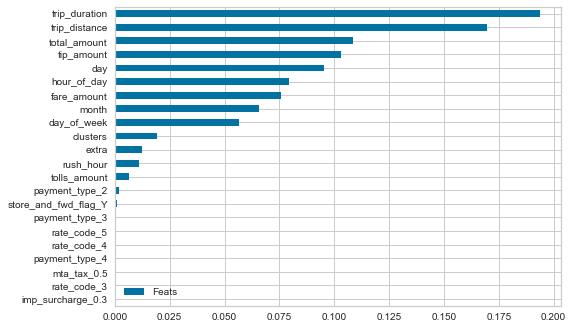

In [76]:
pd.DataFrame(rf.feature_importances_, index = dummytest.columns, columns = ['Feats']).sort_values(by='Feats').plot(kind='barh')
plt.show()

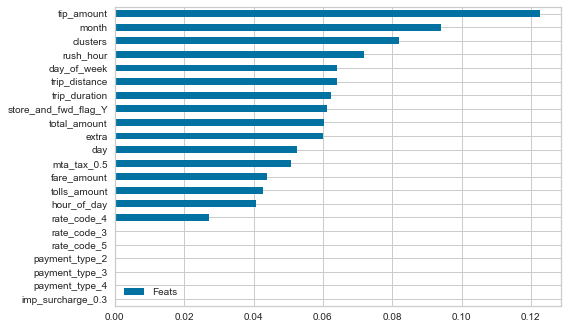

In [77]:
pd.DataFrame(xgb.feature_importances_, index = dummytest.columns, columns = ['Feats']).sort_values(by='Feats').plot(kind='barh')
plt.show()